In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from pandas import DataFrame, Series

%matplotlib inline

#complaints_dec_2014.csv

In [51]:
!uchardet complaints_dec_2014.csv

ASCII


In [52]:
#Upload file
complaints = pd.read_csv('complaints_dec_2014.csv')

In [53]:
#Sample to get idea of data we're working with
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [54]:
#Clean the list of unnecessary columns
complaints = complaints[['Complaint ID', 'Product', 'Date received', 'Company', 'Company response']]

In [55]:
#Sample of new DataFrame
complaints.head(5)

,Complaint ID,Product,Date received,Company,Company response
0,1177167,Debt collection,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation
1,1177166,Debt collection,12/31/2014,"Unique Management Services, Inc",Closed with explanation
2,1177165,Debt collection,12/31/2014,"CL Holdings, LLC",Closed with monetary relief
3,1177164,Debt collection,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief
4,1177163,Debt collection,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation


In [56]:
#Save product complaints to new dataframe
complaints_by_product= complaints['Product'].value_counts()

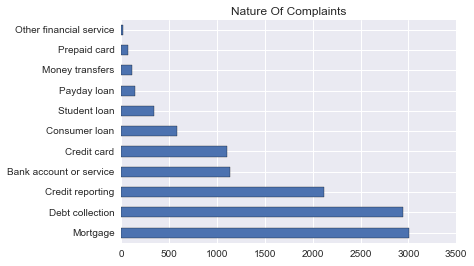

In [57]:
#Bar graph 
complaints_by_product.plot.barh(title = 'Nature Of Complaints')

In [58]:
#Save complaints by company
complaints_by_company = complaints['Company'].value_counts()

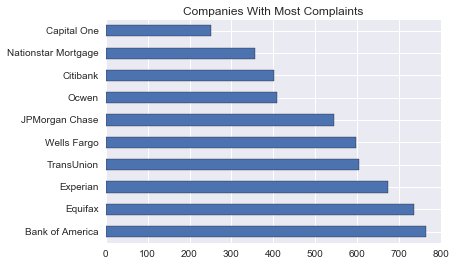

In [59]:
complaints_by_company.head(10).plot.barh(title = "Companies With Most Complaints")

In [60]:
#Save by complaints by company response
complaints_by_response = complaints["Company response"].value_counts()

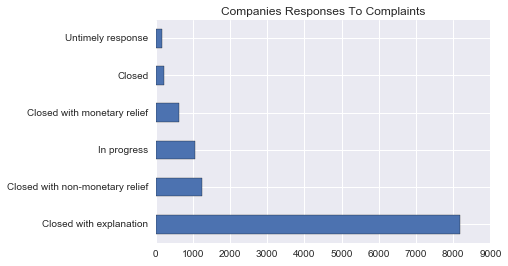

In [61]:
complaints_by_response.plot.barh(title = "Companies Responses To Complaints")

In [62]:
#Store "Date Received" into new variable
days_of_week = complaints['Date received']

In [63]:
#Create DataTime Stamp
complaints.index = pd.to_datetime(days_of_week, format='%m/%d/%Y')

In [64]:
#Visual Test
complaints.head(5)

,Complaint ID,Product,Date received,Company,Company response
Date received,,,,,
2014-12-31,1177167,Debt collection,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation
2014-12-31,1177166,Debt collection,12/31/2014,"Unique Management Services, Inc",Closed with explanation
2014-12-31,1177165,Debt collection,12/31/2014,"CL Holdings, LLC",Closed with monetary relief
2014-12-31,1177164,Debt collection,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief
2014-12-31,1177163,Debt collection,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation


In [65]:
#Create new colummns for weekday datatime attribute and quantity
complaints['New week'] = complaints.index.to_series().map(lambda d: d.weekday())

In [68]:
#Sort and quantify
day_of_week = complaints.groupby('New week').size()

In [78]:
#Show days (0 is Monday, 1 is Tuesdsay, etc.) and quanttity of complaints for that day
day_of_week

New week
0    2544
1    2580
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64

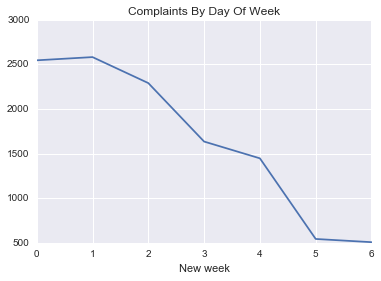

In [79]:
day_of_week.plot(title = "Complaints By Day Of Week")

In [ ]:
#To pop days_of_week, utilize "days_of_week = complaints.pop('Date received')"